Reference : https://app.jedha.co/course/a-b-testing-and-web-analytics-e/loan-control-with-qonto-e

1. Import des lib
1. Import Dataset
1. Exploratory Data Analysis
1. Define hypothesis
1. Calculate Z-Score
1. Set $\alpha$ 
1. Compare p-value with $\alpha$ 



## 1 - Import des lib

In [80]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest 

## 2 - Import dataset

In [87]:
df = pd.read_csv ("swile_sales_calls.csv")
print(df.head())
print(f"Il y a {len(df)} échantillons" )

   calls_abroad  calls_in_France
0             4                6
1             4                2
2             4                9
3             9                9
4             2                9
Il y a 70 échantillons


## Step 3 - Exploratory Data Analysis (EDA)

Moyenne des appels : 5.50 
Moyenne des appels FR : 5.79 


<Axes: >

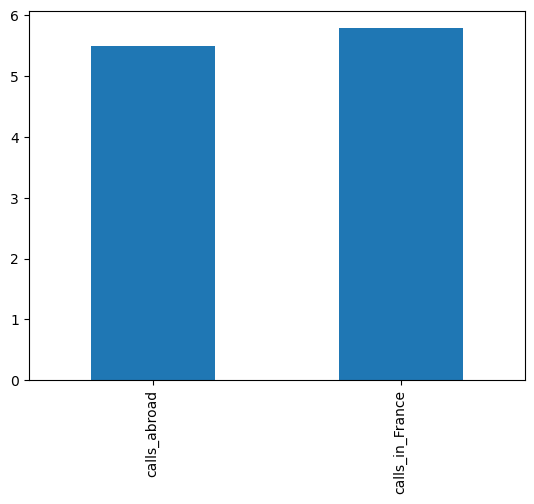

In [82]:
df.describe()
print(f"Moyenne des appels : {df['calls_abroad'].mean():.02f} ") 
print(f"Moyenne des appels FR : {df['calls_in_France'].mean():.02f} ") 

# y=[]
# y.append(df['calls_abroad'].mean())
# y.append(df['calls_in_France'].mean())
# fig, ax = plt.subplots()
# _ = ax.scatter ([1, 2], y, color='blue', alpha=.50)
# ax.set(ylim=(4, 6))

Means = df.mean()
Means.plot(kind="bar")


## 4 - Define hypothesis
Test whether the average number of calls in France is actually higher than the ones abroad.

$$ H_1 : Calls FR - Calls WW > 0 $$
$$ H_0 : Calls FR - Calls WW <= 0 $$

On va tenter de rejeter $H_0$ ce qui prouvera que $H_1$ est vraie.

### TO DO : À vérifier
Dans le cours il est dit : 

* Only specifically for A/B test, you will consider the following:
* $H_0$ : A-B = 0
* $H_1$ : A-B < 0 or A-B > 0 (depending on your sample results)
* The average conversion for A minus the average conversion for B is equal to 0, which would mean that your variation has no significative impact compared to your control variable.

## 5 - Calculate Z-score
$$ Z = \frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}$$

In [83]:
# Calculate the average calls_in_France
mean_sample = df['calls_in_France'].mean()
print(f"Moyenne des appels FR : {mean_sample:.02f} ") 

# Calculate the std of calls_in_France
std_sample = df['calls_in_France'].std()
print(f"Moyenne des appels FR : {std_sample:.02f} ") 


# Find sample size n
n = len(df)

# Moyenne de la population
mu_pop = df['calls_abroad'].mean()

Z = (mean_sample - mu_pop) / (std_sample/n**.5)
print(f"Z-score = {Z:.3f}")

Moyenne des appels FR : 5.79 
Moyenne des appels FR : 2.05 
Z-score = 1.166


## 6 - Set $\alpha$ 
Talking with Swile's marketing team, they told us that 10% seemed enough.

alpha = 0.10

## 7 - Compare p-value to $\alpha$

In [84]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html
# In the one sample case, value is the mean of x1 under the Null hypothesis. 
# In the two sample case, value is the difference between mean of x1 and mean of x2 under the Null hypothesis
# Alternative :
#   ‘two-sided’: H1: difference in means not equal to value (default) 
#   ‘larger’   : H1: difference in means larger than value 
#   ‘smaller’  : H1: difference in means smaller than value


z_score, p_value = ztest(df["calls_in_France"], value = mu_pop, alternative="larger" )
print (f"Z-score value is : {z_score:.4f}")
print (f"p_value value is : {p_value:.4f}")

Z-score value is : 1.1665
p_value value is : 0.1217


La p_value n'est pas inférieure à $\alpha$ donc on ne peut pas rejeter l'hypothèse nulle.

## 8 - Visualize probability

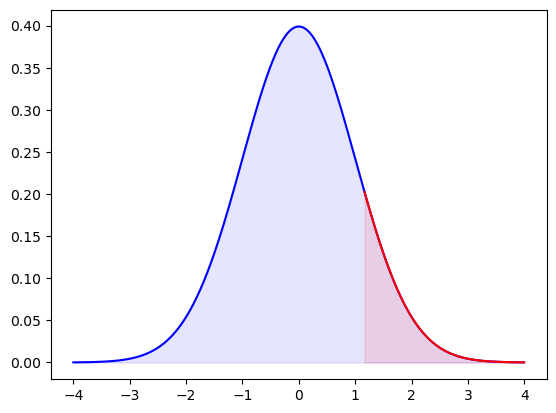

In [85]:
from scipy.stats import norm
  
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color='blue', alpha=1.00)
ax.fill_between(x_values, y_values, 0, color='blue', alpha=.1)

if(z_score<0) :
  x_values2 = np.arange(-4, z_score, 0.01)
else:
  x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color='red', alpha=1.00)
ax.fill_between(x_values2, y_values2, 0, color='red', alpha=.1)

plt.show()